In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector


db = mysql.connector.connect(host="localhost",
                            username="root",
                            password="bidsdeba3114",
                            database="ecommerce")

cur=db.cursor()

# 1. List all unique cities where customers are located.


In [2]:
query = """select distinct(customer_city) from customers """

cur.execute(query)

data = cur.fetchall()

data

[('franca',),
 ('sao bernardo do campo',),
 ('sao paulo',),
 ('mogi das cruzes',),
 ('campinas',),
 ('jaragua do sul',),
 ('timoteo',),
 ('curitiba',),
 ('belo horizonte',),
 ('montes claros',),
 ('rio de janeiro',),
 ('lencois paulista',),
 ('caxias do sul',),
 ('piracicaba',),
 ('guarulhos',),
 ('pacaja',),
 ('florianopolis',),
 ('aparecida de goiania',),
 ('santo andre',),
 ('goiania',),
 ('cachoeiro de itapemirim',),
 ('sao jose dos campos',),
 ('sao roque',),
 ('camacari',),
 ('resende',),
 ('sumare',),
 ('novo hamburgo',),
 ('sao luis',),
 ('sao jose',),
 ('santa barbara',),
 ('ribeirao preto',),
 ('ituiutaba',),
 ('taquarituba',),
 ('sao jose dos pinhais',),
 ('barrinha',),
 ('parati',),
 ('dourados',),
 ('trindade',),
 ('cascavel',),
 ('fortaleza',),
 ('brasilia',),
 ('pelotas',),
 ('porto alegre',),
 ('salto',),
 ('jundiai',),
 ('cacapava',),
 ('sao vicente',),
 ('uberlandia',),
 ('botelhos',),
 ('sao goncalo',),
 ('araucaria',),
 ('nova iguacu',),
 ('areia branca',),
 ('campo

# 2. Count the number of orders placed in 2017.


In [3]:
query = """select count(order_id) from orders where year(order_purchase_timestamp)=2017 """

cur.execute(query)

data = cur.fetchall()

"total orders placed in 2017 are", data[0][0]

('total orders placed in 2017 are', 405909)

# 3. Find the total sales per category.


In [4]:
query = """ select products.product_category category,
round(sum(payments.payment_value),2) sales
from products join order_items
on products.product_id = order_items.product_id
join payments 
on payments.order_id = order_items.order_id
group by category
"""

cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data , columns = ["Category" , "Sales"])
df

,Category,Sales
0,perfumery,2.594502e+08
1,Furniture Decoration,7.322503e+08
2,telephony,2.492836e+08
3,bed table bath,8.768275e+08
4,automotive,4.363747e+08
...,...,...
69,cds music dvds,6.141082e+05
70,La Cuisine,1.491727e+06
71,Fashion Children's Clothing,4.022630e+05
72,PC Gamer,1.113308e+06


 # 4. Calculate the percentage of orders that were paid in installments.


In [5]:
query = """ select sum(case when payment_installments >= 1 then 1
else 0 end) from payments
"""

cur.execute(query)

data = cur.fetchall()

data

[(Decimal('831072'),)]

# 5. Count the number of customers from each state. 


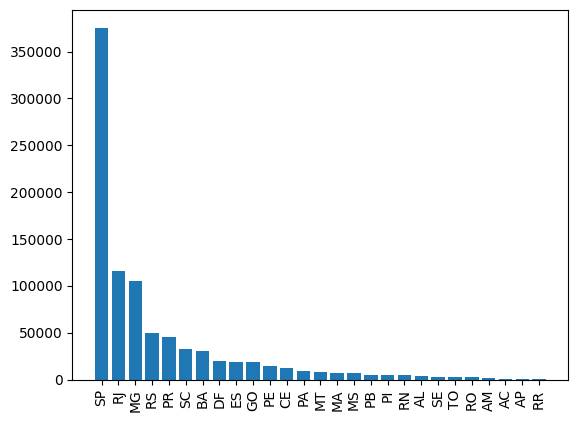

In [6]:
query = """ select customer_state , count(customer_id)
from customers group by customer_state
"""

cur.execute(query)
data = cur.fetchall()
data
df = pd.DataFrame(data, columns = ["state", "customer_count" ])
df=df.sort_values(by = "customer_count", ascending=False)

plt.bar(df["state"], df["customer_count"])
plt.xticks(rotation = 90)
plt.show()

# 6. Calculate the number of orders per month in 2018.


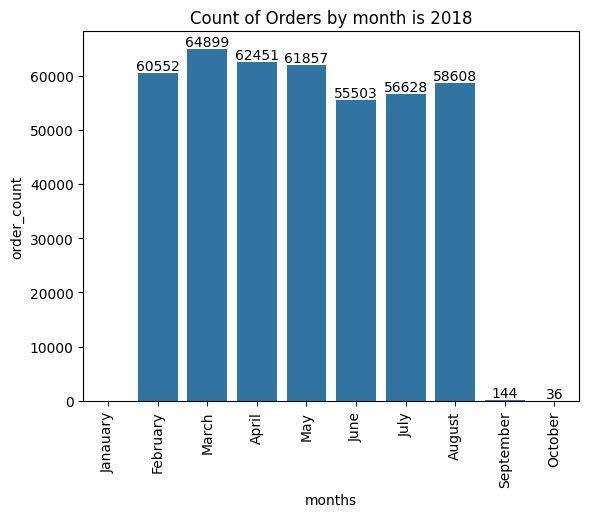

In [7]:
query = """ select monthname(order_purchase_timestamp) months , count(order_id) order_count
from orders where year(order_purchase_timestamp) = 2018
group by months
"""

cur.execute(query)
data= cur.fetchall()
df=pd.DataFrame(data, columns = ["months", "order_count"])
o = ["Janauary", "February", "March", "April", "May", "June" ,"July", "August" ,"September", "October"]

ax=sns.barplot(x = df["months"],y = df["order_count"], data =  df,  order = o)
plt.xticks(rotation= 90)

ax.bar_label(ax.containers[0])
plt.title("Count of Orders by month is 2018")
plt.show()


# 7.Find the average number of products per order, grouped by customer city.

In [8]:
query = """with count_per_order as
(SELECT orders.order_id, orders.customer_id, count(order_items.order_id) as oc
from orders join order_items
on orders.order_id = order_items.order_id
group by orders.order_id , orders.customer_id)

select customers.customer_city, round( avg(count_per_order.oc),2) average_orders
from customers join count_per_order
on customers.customer_id = count_per_order.customer_id
group by customers.customer_city order by average_orders desc
"""

cur.execute(query)
data= cur.fetchall()
df=pd.DataFrame(data)
df.head(10)

,0,1
0,padre carvalho,504.00
1,celso ramos,468.00
2,datas,432.00
3,candido godoi,432.00
4,matias olimpio,360.00
5,cidelandia,288.00
6,curralinho,288.00
7,picarra,288.00
8,morro de sao paulo,288.00
9,teixeira soares,288.00


# 8.Calculate the percentage of total revenue contributed by each product category.

In [2]:
query ="""select upper(products.product_category) category,
round((sum(payments.payment_value)/(select sum(payment_value) from payments))*100,2) sales_percentage
from products join order_items
on products.product_id = order_items.product_id
join payments 
on payments.order_id = order_items.order_id
group by category order by sales_percentage desc
"""

cur.execute(query)
data= cur.fetchall()


df = pd.DataFrame(data,columns = ["Category", "percentage distribution"])
df.head()

,Category,percentage distribution
0,BED TABLE BATH,684.64
1,HEALTH BEAUTY,662.58
2,COMPUTER ACCESSORIES,633.78
3,FURNITURE DECORATION,571.75
4,WATCHES PRESENT,571.37


# 9. Identify the correlation between product price and the number of times a product has been purchased

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector
import numpy as np


db = mysql.connector.connect(host="localhost",
                            username="root",
                            password="bidsdeba3114",
                            database="ecommerce")

cur=db.cursor()
query ="""select products.product_category,
count(order_items.product_id),
round(avg(order_items.price),2)
from products join order_items
on products.product_id = order_items.product_id
group by products.product_category
"""
cur.execute(query)
data= cur.fetchall()


df = pd.DataFrame(data,columns = ["Category", "order_count", "price"])



arr1 = df["order_count"]
arr2 = df["price"]

a= np.corrcoef([arr1,arr2])
print("the correlation between price and the number of times a product has been purchased is ", a[0][1])

the correlation between price and the number of times a product has been purchased is  -0.10631514167157562


# 10.Calculate the total revenue generated by each seller, and rank them by revenue.

In [ ]:
query = """select *, dense_rank() over(order by revenue desc) as rn from 
(select order_items.seller_id, sum(payments.payment_value)
revenue from order_items join payments
on order_items.order_id = payments.order_id
group by order_items.seller_id) as a"""


cur.execute(query)
data= cur.fetchall()
df = pd.DataFrame(data, columns = ["seller_id", "revenue", "rank"])
df = df.head()
sns.barplot(x = "seller_id", y = "revenue", data = df)
plt.xticks(rotation=90)
plt.show()